![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/E2E_classification.ipynb)


# E2E Classification with NLU 

# 1. Install Java and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-04 01:14:15--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.002s  

2021-05-04 01:14:16 (993 KB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 74kB/s 
     |████████████████████████████████| 153kB 46.7MB/s 
     |████████████████████████████████| 204kB 22.8MB/s 
     |████████████████████████████████| 204kB 55.8MB/s 


# 2. Download E2E model and predict classes for sample string

In [ ]:
import nlu
e2e_pipe  = nlu.load('e2e')
e2e_pipe.predict('E2E is a dataset for training generative models')

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,text,e2e_confidence_confidence,origin_index,sentence,sentence_embedding_tfhub_use,e2e
0,E2E is a dataset for training generative models,E2E is a dataset for training generative models,"[0.7497887, 0.7497887, 0.7497887]",8589934592,[E2E is a dataset for training generative models],"[[0.021445205435156822, -0.039284929633140564,...","[priceRange[£20-25], priceRange[moderate], fam..."


# 3. Download Dataset

In [ ]:
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2021-05-04 01:18:55--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.88.253
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.88.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  47.4MB/s    in 5.8s    

2021-05-04 01:19:01 (41.8 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



# 4. Predict on pandas dataset and visualize predictions


In [ ]:
e2e_pipe  = nlu.load('e2e')
df['text'] = df['comment']
e2e_predictions = e2e_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
e2e_predictions

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,text,e2e_confidence_confidence,origin_index,sentence,sentence_embedding_tfhub_use,e2e
0,NC and NH.,NC and NH.,"[0.8991002, 0.8991002, 0.8991002, 0.8991002, 0...",0,NC and NH.,"[-0.06570463627576828, -0.03522052243351936, -...","[eatType[restaurant], name[The Phoenix], price..."
1,You do know west teams play against west teams...,You do know west teams play against west teams...,"[0.913401, 0.913401]",1,You do know west teams play against west teams...,"[-0.0254225991666317, 0.05448468029499054, -0....","[customer rating[average], near[The Portland A..."
2,"They were underdogs earlier today, but since G...","They were underdogs earlier today, but since G...","[0.9653829, 0.9653829, 0.9653829, 0.9653829]",2,"They were underdogs earlier today, but since G...","[-0.0035701016895473003, -0.030124755576252937...","[food[French], customer rating[1 out of 5], pr..."
3,"This meme isn't funny none of the ""new york ni...","This meme isn't funny none of the ""new york ni...","[0.9862992, 0.9862992, 0.9862992, 0.9862992, 0...",3,"This meme isn't funny none of the ""new york ni...","[0.06464719027280807, -0.023972544819116592, -...","[customer rating[low], eatType[coffee shop], p..."
4,I could use one of those tools.,I could use one of those tools.,"[0.9699397, 0.9699397, 0.9699397, 0.9699397]",4,I could use one of those tools.,"[0.028676817193627357, 0.0199710875749588, 0.0...","[near[Café Sicilia], priceRange[cheap], priceR..."
...,...,...,...,...,...,...,...
995,Have you bound your pistol on mouse wheel?,Have you bound your pistol on mouse wheel?,"[0.97372156, 0.97372156, 0.97372156, 0.9737215...",8589935087,Have you bound your pistol on mouse wheel?,"[-0.04123315587639809, 0.049579471349716187, -...","[eatType[pub], customer rating[5 out of 5], fo..."
996,Imagine showing that to someone a little over ...,Imagine showing that to someone a little over ...,"[0.8345744, 0.8345744, 0.8345744]",8589935088,Imagine showing that to someone a little over ...,"[0.0263528935611248, -0.06056991219520569, -0....","[priceRange[moderate], food[Fast food], family..."
997,I wish Schumer and Reid had not endorsed Keith...,I wish Schumer and Reid had not endorsed Keith...,"[0.9901957, 0.9901957]",8589935089,I wish Schumer and Reid had not endorsed Keith...,"[0.07649341225624084, 0.05448545515537262, -0....","[priceRange[moderate], familyFriendly[no]]"
998,"yeah, god forbid jesse look out for his fans b...","yeah, god forbid jesse look out for his fans b...","[0.94846725, 0.94846725, 0.94846725, 0.9484672...",8589935090,"yeah, god forbid jesse look out for his fans b...","[0.049849480390548706, -0.054164644330739975, ...","[name[The Wrestlers], customer rating[low], fo..."


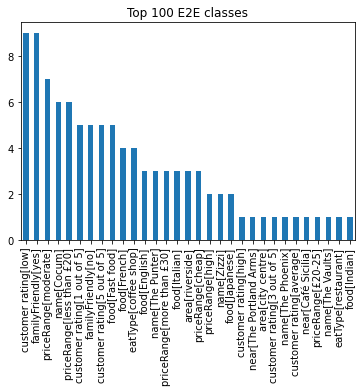

In [ ]:
e2e_predictions.explode('e2e').e2e.iloc[0:100].value_counts().plot.bar(title='Top 100 E2E classes')